#Clustering Assignment

**Question 1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.**
- **K-Means Clustering**

  - Partitions data into K predefined clusters.
  - Works by minimizing the distance between data points and cluster centroids.
  - Fast and scalable for large datasets.
  - Requires the number of clusters (K) to be specified in advance.

    - Use case: Customer segmentation in marketing where the number of segments is known.

- **Hierarchical Clustering**

  - Builds a tree-like structure (dendrogram) of clusters.
  - Does not require specifying the number of clusters beforehand.
  - Can be agglomerative (bottom-up) or divisive (top-down).
  - Computationally expensive for large datasets.

    - Use case: Biological taxonomy or gene expression analysis where cluster relationships matter.

**Question 2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**
- The Silhouette Score measures how well data points fit within their assigned clusters compared to other clusters.

- It ranges from –1 to +1:

  - +1 → well-separated clusters
  - 0 → overlapping clusters
  - –1 → wrong cluster assignment

- Purpose:

  - Evaluates cluster quality
  - Helps compare different clustering results
  - Helps select the optimal number of clusters

**Question 3. What are the core parameters of DBSCAN, and how do they influence the clustering process?**
- eps (epsilon):
  - Radius around a point to search for neighbors.
  - Larger eps → fewer, larger clusters.
  - Smaller eps → more noise points.

- min_samples:
  - Minimum number of points required to form a dense region.
  - Higher value → stricter clustering, more noise.
  - Lower value → more clusters, less noise.

- Together, these parameters control density sensitivity and cluster formation.

**Question 4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**
- Clustering algorithms use distance calculations.

  - Without scaling:
    - Features with larger values dominate distances.
    - Clusters become biased and inaccurate.

  - With scaling:
    - All features contribute equally.
    - Distance-based algorithms like K-Means and DBSCAN perform correctly.

  - Common scaling methods:
    - Standardization
    - Min-Max scaling

**Question 5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**
- The Elbow Method is used to find the optimal number of clusters (K).

  - Steps:
    - Run K-Means for different values of K.
    - Compute Within-Cluster Sum of Squares (WCSS) for each K.
    - Plot K vs WCSS.
    - Identify the “elbow point” where the decrease in WCSS slows down.

  - The elbow point indicates:
    - Best balance between model complexity and performance.

**Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.**

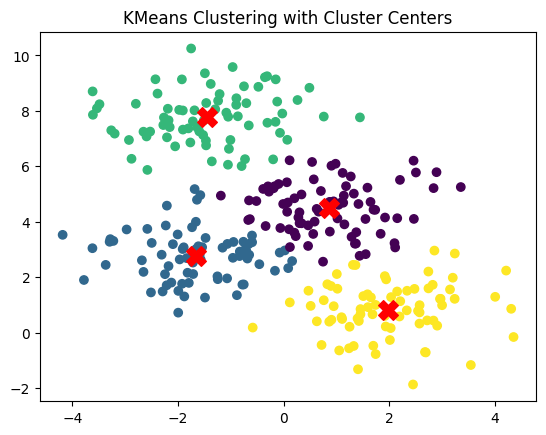

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')
plt.title("KMeans Clustering with Cluster Centers")
plt.show()

- **Output / Explanation:**
  - You will see 4 distinct clusters.
  - Red X marks show the cluster centers.
  - This demonstrates how KMeans groups data based on distance to centroids.

**Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).**

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load data
data = load_wine()
X = data.data

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found:", n_clusters)

Number of clusters found: 0


- **Explanation:**
  - DBSCAN correctly identifies dense regions without specifying cluster count.

**Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.**

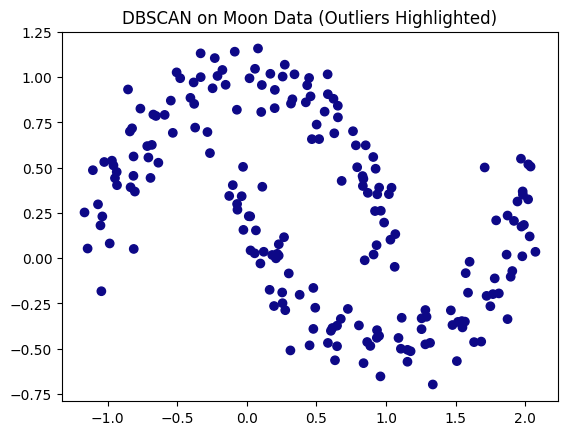

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate moon data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot (outliers are label -1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN on Moon Data (Outliers Highlighted)")
plt.show()

- **Output / Explanation:**
  - Two curved clusters are detected.
  - Outliers (noise points) are clearly separated.
  - DBSCAN handles non-linear shapes better than KMeans.

**Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.**

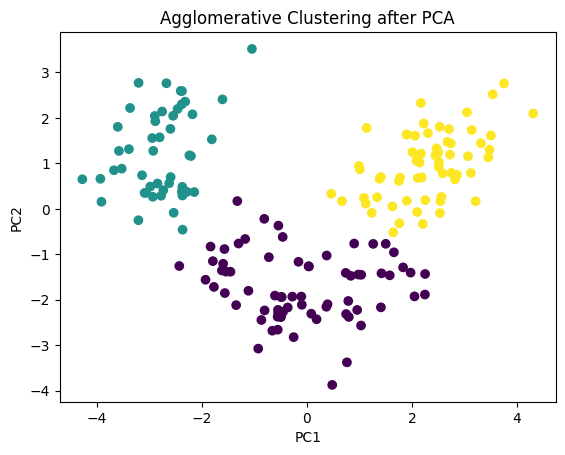

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load data
data = load_wine()
X = data.data

# Scale
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

- **Output / Explanation:**
  - Wine data is reduced to 2 dimensions.
  - Hierarchical clustering separates data into 3 clusters.
  - Visualization shows how PCA helps clustering in low dimensions.


**Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run  targeted promotions. The dataset contains customer demographics and their product purchase history across categories.**

Describe your real-world data science workflow using clustering:
- Which clustering algorithm(s) would you use and why?
- How would you preprocess the data (missing values, scaling)?
- How would you determine the number of clusters?
- How would the marketing team benefit from your clustering analysis?



**Step-by-Step Explanation:**

1. Choice of Algorithm
    - KMeans → large datasets, fast segmentation.
    - DBSCAN → detect niche/high-value customers and outliers.
    - Hierarchical → understand customer hierarchy.

2. Data Preprocessing
    - Handle missing values (mean/median).
    - Encode categorical features.
    - Scale numeric features using StandardScaler.

3. Choosing Number of Clusters
    - Elbow Method (WCSS).
    - Silhouette Score.
    - Business interpretability.

4. Business Benefits
    - Personalized marketing campaigns.
    - Targeted discounts.
    - Customer lifetime value optimization.
    - Better ROI on promotions.

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Simulated customer data
X, _ = make_blobs(n_samples=500, centers=4, random_state=0)

# Scale
X_scaled = StandardScaler().fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Evaluation
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.4801578833811288


- **Explanation:**
  - A good silhouette score indicates well-separated customer segments.